# PREPARE DATA

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.validation import check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# read csv file into dataframe
df = pd.read_csv("MY DATASETS/Titanic-Dataset.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXPLORING MY DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# checke columns on dataset
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
# check number of unique values in each features
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# identify minor and major classes 
df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

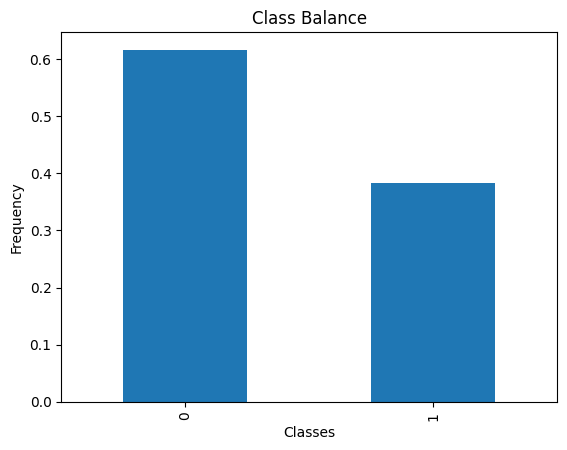

In [8]:
df["Survived"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Classes", 
    ylabel="Frequency", 
    title="Class Balance"
);

In [9]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

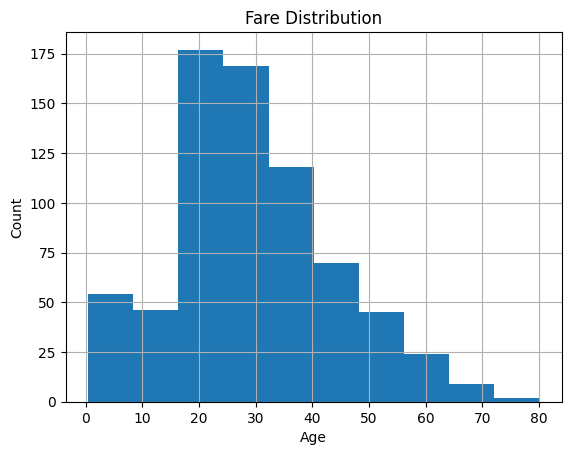

In [10]:
# Plot histogram of `feat_27`
df["Age"].hist()
plt.xlabel("Age")
plt.ylabel("Count"),
plt.title("Fare Distribution");

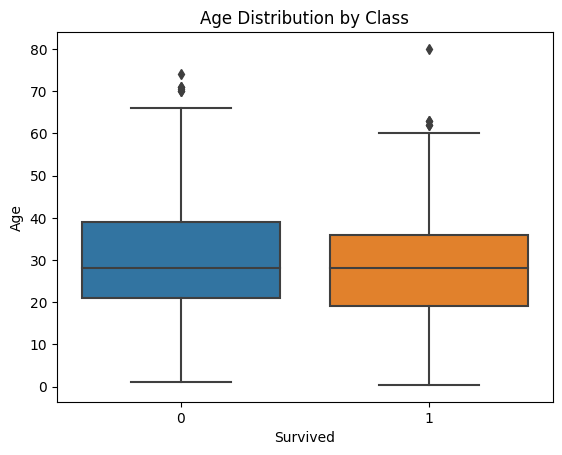

In [11]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age Distribution by Class");

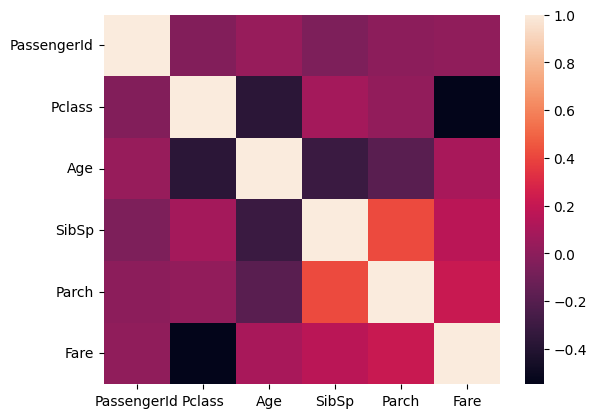

In [12]:
#correlation heatmap -- checking multicollinearity
corr = df.select_dtypes("number").drop(columns = "Survived").corr()
sns.heatmap(corr);

In [ ]:
# drop multicollinearity features
# drop high-low cardinality features
df.drop(columns=['Cabin',"PassengerId", "Name", "SibSp"], inplace=True)
df.select_dtypes("object").columns

In [14]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,0,A/5 21171,7.2500,S
1,1,1,female,38.0,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,0,113803,53.1000,S
4,0,3,male,35.0,0,373450,8.0500,S


In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

# SPLIT DATASET

In [16]:
# vertical split
target = "Survived"
X = df.drop(columns=target)
y = df[target]

In [17]:
# horizontal split
X_train,X_test,y_train,y_test = train_test_split(
    
    X,y, test_size=0.2,random_state = 42
)
print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

X train shape: (712, 7)
X test shape: (179, 7)
y train shape: (712,)
y test shape: (179,)


In [18]:
# train validation test split
X_train,X_val,y_train,y_val = train_test_split(
    X_train,y_train,test_size=0.2,random_state=42
)
print("X train shape:", X_train.shape)
print("X val shape:", X_val.shape)
print("y train shape:", y_train.shape)
print("y val shape:", y_val.shape)

X train shape: (569, 7)
X val shape: (143, 7)
y train shape: (569,)
y val shape: (143,)


# BUILD MODEL

## Set Baseline

In [19]:
#baseline model using accuracy_score
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline,2))

Baseline Accuracy: 0.63


## Iterate

## Built a pipeline, setting LogisticRegression as predictor

In [20]:
# create pipeline
model_lr= make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="median"),
    LogisticRegression(max_iter=1000)
)
model_lr.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Sex', 'Ticket', 'Embarked'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

## Evaluate

In [21]:
# calculate training and test set accuracy_score
acc_train = accuracy_score(y_train, model_lr.predict(X_train))
acc_test = accuracy_score(y_test, model_lr.predict(X_test))
print("LR Training Accuracy:", round(acc_train,2))
print("LR Test Accuracy:", round(acc_test,2))

LR Training Accuracy: 0.88
LR Test Accuracy: 0.82


## Built a pipeline setting DECISION TREE CLASSIFIER as predictor

In [22]:
# build model
model_reg = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)  
)
model_reg.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Sex', 'Ticket', 'Embarked'],
                                mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                                          'mapping': male      1
female    2
NaN      -2
dtype: int64},
                                         {'col': 'Ticket',
                                          'data_type': dtype('O'),
                                          'mapping': 371110                  1
CA. 2343                2
C.A. 34651              3
4134                    4
237736                  5
                     ... 
367229                458
364516                459
11668                 460
SOTON/O.Q. 3101307    461
NaN                    -2
Length: 462, dtype: int64},
                                         {'col': 'Embarked',
                                          'data_type': dtype('O'),
                                          'mapping': Q      1
S      2
C      3
NaN    4
dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate

In [23]:
# Evaluate
# calculate training and test set accuracy_score
acc_train = accuracy_score(y_train, model_reg.predict(X_train))
acc_test = model_reg.score(X_val, y_val)
print(acc_train, acc_test)

0.9982425307557118 0.7832167832167832


In [24]:
tree_depth = model_reg.named_steps["decisiontreeclassifier"].get_depth()
print(tree_depth)

17


# HYPERPARAMETER TUNING USING A FOR LOOP

In [25]:
# create a range
depth_hyperparams = range(1,50,2)
# create empty lists to iterate through depth_hyperparams
training_acc = []
validation_acc = []
for d in depth_hyperparams:
    # create model with max_depth of d
    test_model = make_pipeline(
       OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d,random_state=42)
    )
    test_model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    #fit model to training data
    test_model.fit(X_train,y_train)
    # calculate training accuracy_score and append to "training_acc"
    training_acc.append(test_model.score(X_train,y_train))
    # calculate validation accuracy_score and append to "validation_acc"
    validation_acc.append(test_model.score(X_val,y_val))
print("Training Accuracy score:",training_acc[:3])
print("Validation Accuracy score:",validation_acc[:3])

Training Accuracy score: [0.7803163444639719, 0.827768014059754, 0.8541300527240774]
Validation Accuracy score: [0.8181818181818182, 0.8111888111888111, 0.8321678321678322]


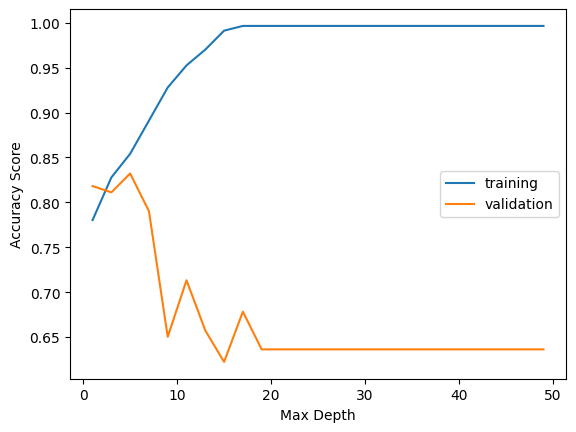

In [26]:
# plot validation curve
plt.plot(depth_hyperparams,training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc,label="validation")
# label axes
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

In [27]:
# creating final model
final_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    DecisionTreeClassifier(max_depth=4, random_state=42)
)
final_model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Sex', 'Ticket', 'Embarked'],
                                mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                                          'mapping': male      1
female    2
NaN      -2
dtype: int64},
                                         {'col': 'Ticket',
                                          'data_type': dtype('O'),
                                          'mapping': 371110                  1
CA. 2343                2
C.A. 34651              3
4134                    4
237736                  5
                     ... 
367229                458
364516                459
11668                 460
SOTON/O.Q. 3101307    461
NaN                    -2
Length: 462, dtype: int64},
                                         {'col': 'Embarked',
                                          'data_type': dtype('O'),
                                          'mapping': Q      1
S      2
C      3
NaN    4
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [28]:
# evaluate model
acc_test = final_model.score(X_val,y_val)
print("Test set Accuracy Score:", round(acc_test,2))

Test set Accuracy Score: 0.84


# COMMUNICATE RESULTS

In [29]:
# get importances
importances = final_model.named_steps["decisiontreeclassifier"].feature_importances_
# put importances into series
feat_imp = pd.Series(importances,index=X_train.columns).sort_values()
feat_imp.head()

Parch       0.000000
Embarked    0.000000
Ticket      0.017464
Fare        0.100105
Age         0.106509
dtype: float64

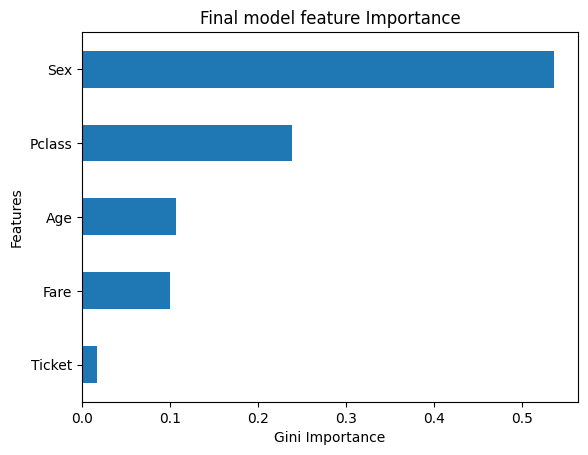

In [31]:
# plot series
feat_imp.tail().plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Final model feature Importance");